In [1]:
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open("/content/drive/Shareddrives/인빅_프로젝트/FC주문/FC_order.pickle","rb") as fr:
    df = pickle.load(fr)

In [4]:
#df = df[df['CORP_ID'] == 'KX007'].dropna(axis=0)
df

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16,00281,NaN,100,NaN,N,NaN,1.0,00281,00281,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676908,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17,00316,NaN,168,NaN,N,NaN,1.0,00316,00316,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676909,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18,00338,NaN,100,NaN,N,NaN,1.0,00338,00338,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676910,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19,00183,NaN,50,NaN,N,NaN,1.0,00183,00183,Y,8981,NaN,5F20,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


In [5]:
data = df

In [6]:
data['BKG_DATE'] = data.BKG_DATE.apply(lambda x: str(x))

data["초"] = data.BKG_TIME.apply(lambda x : str(x)[-2:])
data["초"] = data.초.apply(lambda x : str(0)*2 if x == '' else x)
data["초"] = data.초.apply(lambda x : str(0) + x if len(x)==1 else x)

data["분"] = data.BKG_TIME.apply(lambda x : str(x)[-4:-2])
data["분"] = data.분.apply(lambda x : str(0)*2 if x == '' else x)
data["분"] = data.분.apply(lambda x : str(0) + x if len(x)==1 else x)

data["시"] = data.BKG_TIME.apply(lambda x : str(x)[:-4])
data["시"] = data.시.apply(lambda x : str(0)*2 if x == '' else x)
data["시"] = data.시.apply(lambda x : str(0)+x if len(x) == 1 else x)

data.head()

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,21,55,03
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,13,55,03
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,08,56,03
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,51,55,03


In [7]:
data['BKG_TIME'] = data.BKG_DATE + ' ' + data.시 + ':' + data.분 + ':' + data.초
data['BKG_TIME'] = data.BKG_TIME.apply(lambda x: pd.to_datetime(x,format="%Y%m%d %H:%M:%S",errors='raise'))

data["TIME"] = data.BKG_DATE + ' ' + data.시
data["TIME"] = data.TIME.apply(lambda x: pd.to_datetime(x,format="%Y%m%d %H",errors='raise'))

In [8]:
data["Year"] = data.BKG_TIME.apply(lambda x: x.year)

data["Month"] = data.BKG_TIME.apply(lambda x: x.month)
data["Month"] = data.Month.apply(lambda x: str(0)+str(x) if len(str(x)) == 1 else str(x))

data["Day"] = data.BKG_TIME.apply(lambda x: x.day)
data["Day"] = data.Day.apply(lambda x: str(0)+str(x) if len(str(x)) == 1 else str(x))


data['요일'] = data.BKG_TIME.apply(lambda x: x.weekday())
data.head()

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시,TIME,Year,Month,Day,요일
0,KX007,2021030365922551,KX007210303370934,7,20210303,2021-03-03 03:55:10,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03,2021-03-03 03:00:00,2021,03,03,2
1,KX007,2021030365922951,KX007210303371080,7,20210303,2021-03-03 03:55:21,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,21,55,03,2021-03-03 03:00:00,2021,03,03,2
2,KX007,2021030365924361,KX007210303371081,7,20210303,2021-03-03 03:55:13,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,13,55,03,2021-03-03 03:00:00,2021,03,03,2
3,KX007,2021030365928921,KX007210303371205,7,20210303,2021-03-03 03:56:08,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,08,56,03,2021-03-03 03:00:00,2021,03,03,2
4,KX007,2021030365930451,KX007210303370967,7,20210303,2021-03-03 03:55:51,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,51,55,03,2021-03-03 03:00:00,2021,03,03,2


# **12시간 기준**

In [9]:
def time_order_12(data, year, month, day, time):
  if time >= 12:
    date = str(year) + str(month) + str(day)+ str(time)
    diff = pd.to_datetime(date, format="%Y%m%d%H") - dt.timedelta(hours=12)
    return len(data[(data.Year == year)&(data.Month == month)&(data.Day == day)&(data.BKG_TIME.dt.hour < time)&(data.BKG_TIME.dt.hour >= diff.hour)])
    #return pd.to_datetime(date, format="%Y%m%d%H")
  elif time < 12:
    date = str(year) + str(month) + str(day)+ str(time)
    diff = pd.to_datetime(date, format="%Y%m%d%H") - dt.timedelta(hours=12)
    tmp1 = len(data[(data.BKG_TIME.dt.year == diff.year)&(data.BKG_TIME.dt.month == diff.month)&(data.BKG_TIME.dt.day == diff.day)&(data.BKG_TIME.dt.hour >= diff.hour)])
    tmp2 = len(data[(data.BKG_TIME.dt.year == year) &(data.BKG_TIME.dt.month == month)&(data.BKG_TIME.dt.day == day)&(data.BKG_TIME.dt.hour < time)])
    return tmp1 + tmp2

In [10]:
time_order_12(data, 2021, '06', '02', 16)

12006


# **6시간 기준**

In [11]:
def time_order_6(data, year, month, day, time):
  if time >= 6:
    date = str(year) + str(month) + str(day)+ str(time)
    diff = pd.to_datetime(date, format="%Y%m%d%H") - dt.timedelta(hours=6)
    return len(data[(data.Year == year)&(data.Month == month)&(data.Day == day)&(data.BKG_TIME.dt.hour < time)&(data.BKG_TIME.dt.hour >= diff.hour)])
    
  elif time < 6:
    date = str(year) + str(month) + str(day)+ str(time)
    diff = pd.to_datetime(date, format="%Y%m%d%H") - dt.timedelta(hours=6)
    tmp1 = len(data[(data.BKG_TIME.dt.year == diff.year)&(data.BKG_TIME.dt.month == diff.month)&(data.BKG_TIME.dt.day == diff.day)&(data.BKG_TIME.dt.hour >= diff.hour)])
    tmp2 = len(data[(data.BKG_TIME.dt.year == year) &(data.BKG_TIME.dt.month == month)&(data.BKG_TIME.dt.day == day)&(data.BKG_TIME.dt.hour < time)])
    return tmp1 + tmp2

In [12]:
time_order_6(data, 2021, '06', '02', 16)

6093

# **3시간 기준**

In [13]:
def time_order_3(data, year, month, day, time):
  if time >= 3:
    date = str(year) + str(month) + str(day)+ str(time)
    diff = pd.to_datetime(date, format="%Y%m%d%H") - dt.timedelta(hours=3)
    return len(data[(data.Year == year)&(data.Month == month)&(data.Day == day)&(data.BKG_TIME.dt.hour < time)&(data.BKG_TIME.dt.hour >= diff.hour)])
  elif time < 3:
    date = str(year) + str(month) + str(day)+ str(time)
    diff = pd.to_datetime(date, format="%Y%m%d%H") - dt.timedelta(hours=3)
    tmp1 = len(data[(data.BKG_TIME.dt.year == diff.year)&(data.BKG_TIME.dt.month == diff.month)&(data.BKG_TIME.dt.day == diff.day)&(data.BKG_TIME.dt.hour >= diff.hour)])
    tmp2 = len(data[(data.BKG_TIME.dt.year == year) &(data.BKG_TIME.dt.month == month)&(data.BKG_TIME.dt.day == day)&(data.BKG_TIME.dt.hour < time)])
    return tmp1 + tmp2

In [14]:
time_order_3(data, 2021, '06', '02', 16)

3002

In [15]:
data_dup = data.drop_duplicates(['TIME'])
data_dup

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시,TIME,Year,Month,Day,요일
0,KX007,2021030365922551,KX007210303370934,7,20210303,2021-03-03 03:55:10,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03,2021-03-03 03:00:00,2021,03,03,2
17,KX007,2021030257466281,KX007210303370987,7,20210303,2021-03-03 04:02:55,90001441,26900.0,1,712423592_1,조합형옵션상품,1,26900.0,N,2.021030e+13,1.0,2021030299212841,2021030299212841,Y,8207,K07,6M53,2p,iNEXBatch,20210303,131424,50.0,N,경기도,광주시,경상남도,양산시,55,02,04,2021-03-03 04:00:00,2021,03,03,2
22,KX007,9001441,KX007210302311113,8,20210302,2021-03-02 18:47:00,90001441,NaN,1,114585,NaN,2080,NaN,N,NaN,NaN,114585,114585,Y,NaN,NaN,NaN,NaN,LION02,20210226,184836,NaN,N,경기,광주시,경기,광주시,00,47,18,2021-03-02 18:00:00,2021,03,02,1
23,KX007,2021030118681671,KX007210301297523,7,20210301,2021-03-01 01:05:06,90001302,300000.0,1,4880894356,조합형옵션상품,3,300000.0,N,2.021030e+13,1.0,2021030132734961,2021030132734961,Y,1411,D43,6N21,1p,iNEXBatch,20210301,102147,48.0,N,경기도,광주시,부산광역시,수영구,06,05,01,2021-03-01 01:00:00,2021,03,01,0
26,KX007,2021030117918301,KX007210301297419,7,20210301,2021-03-01 00:07:11,90001542,580200.0,1,4884978039_2,조합형옵션상품,2,580200.0,N,2.021030e+13,1.0,2021030131428601,2021030131428601,Y,8363,A97,1M92,1,iNEXBatch,20210301,92144,6.0,N,경기도,광주시,서울특별시,서초구,11,07,00,2021-03-01 00:00:00,2021,03,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624970,GP001,2021063068952321,GP001210630600274,7,20210630,2021-06-30 01:55:56,90001776,60000.0,1,4207106945,단일상품,1,30000.0,N,2.021063e+13,1.0,2021063017664571,2021063017664571,Y,9067,NaN,JJ21,0,iNEXBatch,20210630,21426,3.0,N,세종특별자치시,NaN,서울특별시,은평구,56,55,01,2021-06-30 01:00:00,2021,06,30,2
627316,KX007,2021062831896911,KX007210629573454,7,20210629,2021-06-29 03:00:17,90001443,20700.0,1,5638800672_13,조합형옵션상품,1,20700.0,N,2.021063e+13,1.0,2021062845910121,2021062845910121,Y,5158,V12,4C40,2,iNEXBatch,20210629,31425,1.0,N,경기도,광주시,서울특별시,노원구,17,00,03,2021-06-29 03:00:00,2021,06,29,1
630729,GP001,2021062949310201,GP001210629580329,7,20210629,2021-06-29 08:01:34,90001768,61000.0,1,4748857542_4,조합형옵션상품,1,61000.0,N,2.021063e+13,1.0,2021062975000911,2021062975000911,Y,3686,NaN,WQ06,2,iNEXBatch,20210629,121425,58.0,N,충청남도,천안시,전라남도,무안군,34,01,08,2021-06-29 08:00:00,2021,06,29,1
636693,GP001,2021063070027181,GP001210630603043,7,20210630,2021-06-30 07:23:39,90001704,55000.0,1,8809566172747,조합형옵션상품,1,55000.0,N,2.021063e+13,1.0,2021063019543851,2021063019543851,Y,9069,NaN,JJ05,0,iNEXBatch,20210630,92212,2.0,N,경기도,용인시,서울특별시,동대문구,39,23,07,2021-06-30 07:00:00,2021,06,30,2


In [29]:
data = data.reset_index()

In [30]:
time_12 = []
time_6 = []
time_3 = []

for i in tqdm(data_dup.index):
  time_12.append(time_order_12(data, data.Year[i], data.Month[i], data.Day[i], data.BKG_TIME[i].hour))
  time_6.append(time_order_6(data, data.Year[i], data.Month[i], data.Day[i], data.BKG_TIME[i].hour))
  time_3.append(time_order_3(data, data.Year[i], data.Month[i], data.Day[i], data.BKG_TIME[i].hour))

100%|██████████| 2926/2926 [2:08:14<00:00,  2.63s/it]


In [31]:
time_12 = pd.DataFrame({'주문량':time_12, 'TIME' : data_dup.TIME})
time_6 = pd.DataFrame({'주문량':time_6,'TIME' : data_dup.TIME})
time_3 = pd.DataFrame({'주문량':time_3,'TIME' : data_dup.TIME})

In [32]:
time_12

,주문량,TIME
0,3443,2021-03-03 03:00:00
17,2529,2021-03-03 04:00:00
22,5626,2021-03-02 18:00:00
23,0,2021-03-01 01:00:00
26,0,2021-03-01 00:00:00
...,...,...
624970,797,2021-06-30 01:00:00
627316,6528,2021-06-29 03:00:00
630729,8287,2021-06-29 08:00:00
636693,687,2021-06-30 07:00:00


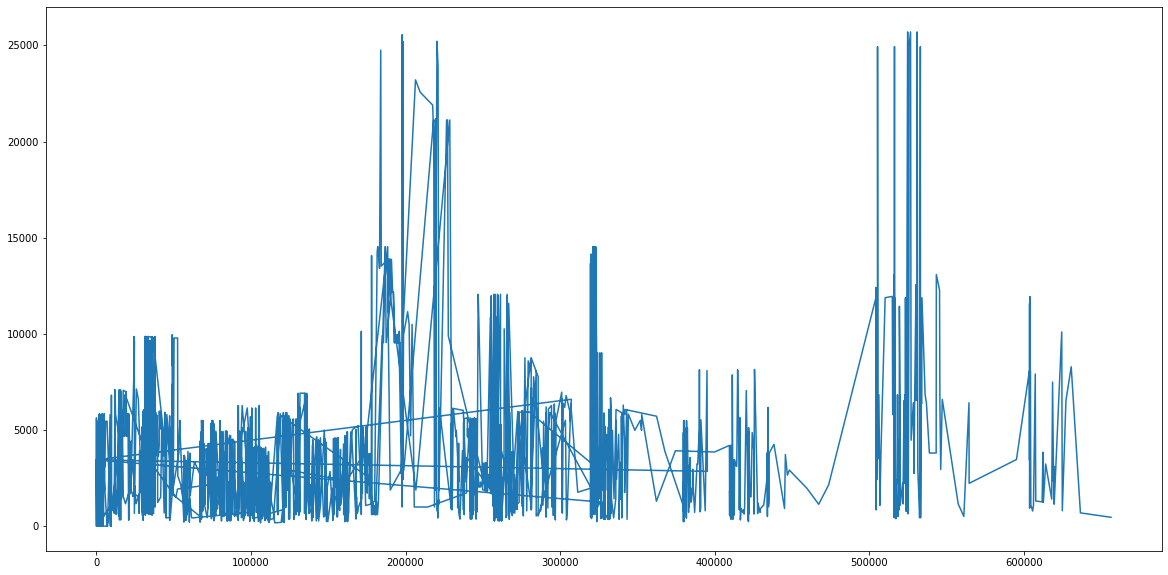

In [33]:
plt.figure(figsize=(20,10))
plt.plot(time_12['주문량'])

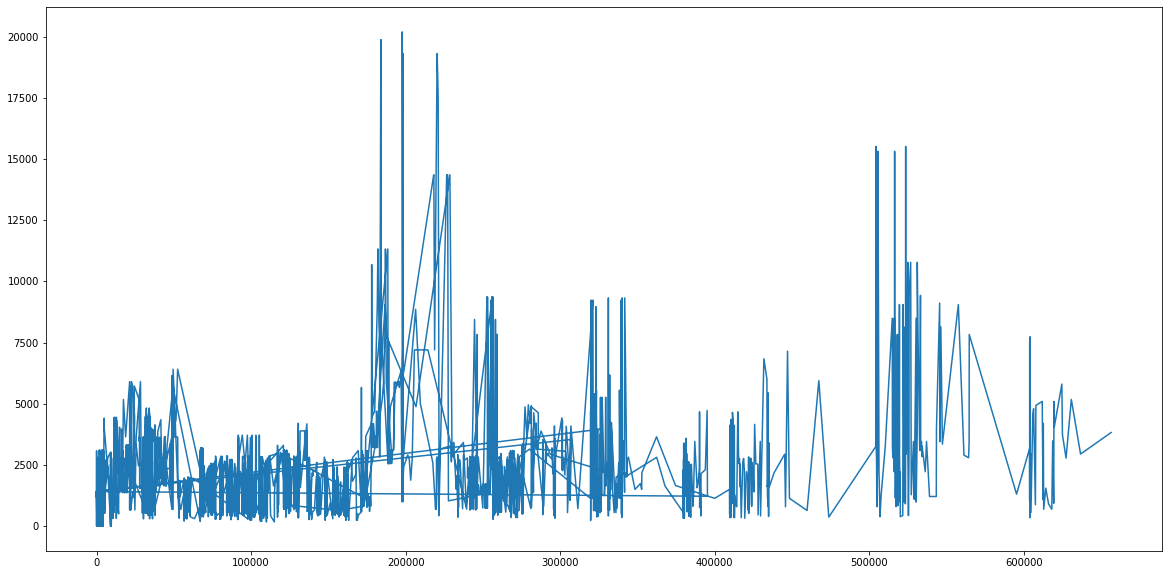

In [34]:
plt.figure(figsize=(20,10))
plt.plot(time_6['주문량'])

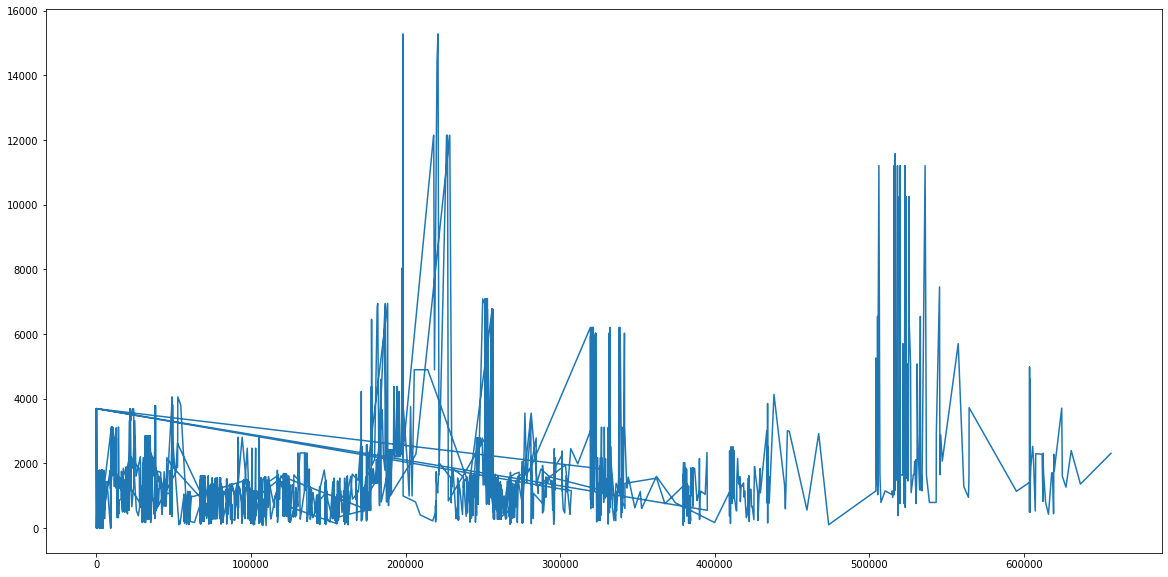

In [35]:
plt.figure(figsize=(20,10))
plt.plot(time_3['주문량'])

In [36]:
time_order_12 = pd.merge(time_12, data, on='TIME')
time_order_12

,주문량,TIME,index,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시,Year,Month,Day,요일
0,3443,2021-03-03 03:00:00,0,KX007,2021030365922551,KX007210303370934,7,20210303,2021-03-03 03:55:10,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03,2021,03,03,2
1,3443,2021-03-03 03:00:00,1,KX007,2021030365922951,KX007210303371080,7,20210303,2021-03-03 03:55:21,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,21,55,03,2021,03,03,2
2,3443,2021-03-03 03:00:00,2,KX007,2021030365924361,KX007210303371081,7,20210303,2021-03-03 03:55:13,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,13,55,03,2021,03,03,2
3,3443,2021-03-03 03:00:00,3,KX007,2021030365928921,KX007210303371205,7,20210303,2021-03-03 03:56:08,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,08,56,03,2021,03,03,2
4,3443,2021-03-03 03:00:00,4,KX007,2021030365930451,KX007210303370967,7,20210303,2021-03-03 03:55:51,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,51,55,03,2021,03,03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786369,687,2021-06-30 07:00:00,676670,KX007,2021063070241151,KX007210630602155,7,20210630,2021-06-30 07:49:25,90001622,29900.0,1,5299553826_1,조합형옵션상품,1,29900.0,N,2.021063e+13,1.0,2021063019883351,2021063019883351,Y,4189,Q01,3D97,1,iNEXBatch,20210630,80232,10.0,N,경기도,광주시,경기도,고양시,25,49,07,2021,06,30,2
1786370,687,2021-06-30 07:00:00,676671,KX007,2021063070241871,KX007210630601974,7,20210630,2021-06-30 07:49:14,90001582,20100.0,1,161523952_1,조합형옵션상품,1,20100.0,N,2.021063e+13,1.0,2021063019884501,2021063019884501,Y,3680,E03,4C67,2,iNEXBatch,20210630,80232,14.0,N,경기도,안산시,경기도,부천시,14,49,07,2021,06,30,2
1786371,687,2021-06-30 07:00:00,676672,GP001,2021063070242781,GP001210630599270,7,20210630,2021-06-30 07:49:21,90001664,360000.0,1,8809444392267,조합형옵션상품,1,360000.0,N,2.021063e+13,1.0,2021063019885951,2021063019885951,Y,9069,NaN,JJ07,0,iNEXBatch,20210630,80232,2.0,N,경기도,용인시,서울특별시,중랑구,21,49,07,2021,06,30,2
1786372,687,2021-06-30 07:00:00,676856,GP001,2021063069948991,GP001210702682509,7,20210630,2021-06-30 07:13:01,90001768,144000.0,1,4930635842_2,조합형옵션상품,1,144000.0,N,2.021063e+13,1.0,2021063019417481,2021063019417481,Y,9045,Y41,7L23,0,iNEXBatch,20210702,194925,54.0,N,충청남도,천안시,전라북도,전주시,01,13,07,2021,06,30,2


In [37]:
time_order_6 = pd.merge(time_6, data, on='TIME')
time_order_6

,주문량,TIME,index,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시,Year,Month,Day,요일
0,1412,2021-03-03 03:00:00,0,KX007,2021030365922551,KX007210303370934,7,20210303,2021-03-03 03:55:10,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03,2021,03,03,2
1,1412,2021-03-03 03:00:00,1,KX007,2021030365922951,KX007210303371080,7,20210303,2021-03-03 03:55:21,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,21,55,03,2021,03,03,2
2,1412,2021-03-03 03:00:00,2,KX007,2021030365924361,KX007210303371081,7,20210303,2021-03-03 03:55:13,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,13,55,03,2021,03,03,2
3,1412,2021-03-03 03:00:00,3,KX007,2021030365928921,KX007210303371205,7,20210303,2021-03-03 03:56:08,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,08,56,03,2021,03,03,2
4,1412,2021-03-03 03:00:00,4,KX007,2021030365930451,KX007210303370967,7,20210303,2021-03-03 03:55:51,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,51,55,03,2021,03,03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786369,2944,2021-06-30 07:00:00,676670,KX007,2021063070241151,KX007210630602155,7,20210630,2021-06-30 07:49:25,90001622,29900.0,1,5299553826_1,조합형옵션상품,1,29900.0,N,2.021063e+13,1.0,2021063019883351,2021063019883351,Y,4189,Q01,3D97,1,iNEXBatch,20210630,80232,10.0,N,경기도,광주시,경기도,고양시,25,49,07,2021,06,30,2
1786370,2944,2021-06-30 07:00:00,676671,KX007,2021063070241871,KX007210630601974,7,20210630,2021-06-30 07:49:14,90001582,20100.0,1,161523952_1,조합형옵션상품,1,20100.0,N,2.021063e+13,1.0,2021063019884501,2021063019884501,Y,3680,E03,4C67,2,iNEXBatch,20210630,80232,14.0,N,경기도,안산시,경기도,부천시,14,49,07,2021,06,30,2
1786371,2944,2021-06-30 07:00:00,676672,GP001,2021063070242781,GP001210630599270,7,20210630,2021-06-30 07:49:21,90001664,360000.0,1,8809444392267,조합형옵션상품,1,360000.0,N,2.021063e+13,1.0,2021063019885951,2021063019885951,Y,9069,NaN,JJ07,0,iNEXBatch,20210630,80232,2.0,N,경기도,용인시,서울특별시,중랑구,21,49,07,2021,06,30,2
1786372,2944,2021-06-30 07:00:00,676856,GP001,2021063069948991,GP001210702682509,7,20210630,2021-06-30 07:13:01,90001768,144000.0,1,4930635842_2,조합형옵션상품,1,144000.0,N,2.021063e+13,1.0,2021063019417481,2021063019417481,Y,9045,Y41,7L23,0,iNEXBatch,20210702,194925,54.0,N,충청남도,천안시,전라북도,전주시,01,13,07,2021,06,30,2


In [38]:
time_order_3 = pd.merge(time_3, data, on='TIME')
time_order_3

,주문량,TIME,index,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시,Year,Month,Day,요일
0,3693,2021-03-03 03:00:00,0,KX007,2021030365922551,KX007210303370934,7,20210303,2021-03-03 03:55:10,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03,2021,03,03,2
1,3693,2021-03-03 03:00:00,1,KX007,2021030365922951,KX007210303371080,7,20210303,2021-03-03 03:55:21,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,21,55,03,2021,03,03,2
2,3693,2021-03-03 03:00:00,2,KX007,2021030365924361,KX007210303371081,7,20210303,2021-03-03 03:55:13,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,13,55,03,2021,03,03,2
3,3693,2021-03-03 03:00:00,3,KX007,2021030365928921,KX007210303371205,7,20210303,2021-03-03 03:56:08,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,08,56,03,2021,03,03,2
4,3693,2021-03-03 03:00:00,4,KX007,2021030365930451,KX007210303370967,7,20210303,2021-03-03 03:55:51,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,51,55,03,2021,03,03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786369,1361,2021-06-30 07:00:00,676670,KX007,2021063070241151,KX007210630602155,7,20210630,2021-06-30 07:49:25,90001622,29900.0,1,5299553826_1,조합형옵션상품,1,29900.0,N,2.021063e+13,1.0,2021063019883351,2021063019883351,Y,4189,Q01,3D97,1,iNEXBatch,20210630,80232,10.0,N,경기도,광주시,경기도,고양시,25,49,07,2021,06,30,2
1786370,1361,2021-06-30 07:00:00,676671,KX007,2021063070241871,KX007210630601974,7,20210630,2021-06-30 07:49:14,90001582,20100.0,1,161523952_1,조합형옵션상품,1,20100.0,N,2.021063e+13,1.0,2021063019884501,2021063019884501,Y,3680,E03,4C67,2,iNEXBatch,20210630,80232,14.0,N,경기도,안산시,경기도,부천시,14,49,07,2021,06,30,2
1786371,1361,2021-06-30 07:00:00,676672,GP001,2021063070242781,GP001210630599270,7,20210630,2021-06-30 07:49:21,90001664,360000.0,1,8809444392267,조합형옵션상품,1,360000.0,N,2.021063e+13,1.0,2021063019885951,2021063019885951,Y,9069,NaN,JJ07,0,iNEXBatch,20210630,80232,2.0,N,경기도,용인시,서울특별시,중랑구,21,49,07,2021,06,30,2
1786372,1361,2021-06-30 07:00:00,676856,GP001,2021063069948991,GP001210702682509,7,20210630,2021-06-30 07:13:01,90001768,144000.0,1,4930635842_2,조합형옵션상품,1,144000.0,N,2.021063e+13,1.0,2021063019417481,2021063019417481,Y,9045,Y41,7L23,0,iNEXBatch,20210702,194925,54.0,N,충청남도,천안시,전라북도,전주시,01,13,07,2021,06,30,2


In [39]:
import pickle

# 데이터 저장
with open('주문량_12.pkl', 'wb') as f:
	pickle.dump(time_order_12, f, protocol=pickle.HIGHEST_PROTOCOL)
    
# 데이터 저장
with open('주문량_6.pkl', 'wb') as f:
	pickle.dump(time_order_6, f, protocol=pickle.HIGHEST_PROTOCOL)
 
 # 데이터 저장
with open('주문량_3.pkl', 'wb') as f:
	pickle.dump(time_order_3, f, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
from google.colab import files
time_12.to_csv('time_12.csv')
!cat time_12.txt
files.download('time_12.csv')
files.download('/content/drive/Shareddrives/인빅_프로젝트/배유진')

cat: time_12.txt: No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
time_6.to_csv('time_6.csv')
!cat time_6.txt
files.download('time_6.csv')
files.download('/content/drive/Shareddrives/인빅_프로젝트/배유진')

cat: time_6.txt: No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
time_3.to_csv('time_3.csv')
!cat time_3.txt
files.download('time_3.csv')
files.download('/content/drive/Shareddrives/인빅_프로젝트/배유진')

cat: time_3.txt: No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
with open("/content/주문량_12_수정.pkl","rb") as fr:
    order_12 = pickle.load(fr)

In [45]:
order_12

,주문량,TIME,index,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,초,분,시,Year,Month,Day,요일
0,3443,2021-03-03 03:00:00,0,KX007,2021030365922551,KX007210303370934,7,20210303,2021-03-03 03:55:10,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,10,55,03,2021,03,03,2
1,3443,2021-03-03 03:00:00,1,KX007,2021030365922951,KX007210303371080,7,20210303,2021-03-03 03:55:21,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,21,55,03,2021,03,03,2
2,3443,2021-03-03 03:00:00,2,KX007,2021030365924361,KX007210303371081,7,20210303,2021-03-03 03:55:13,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,13,55,03,2021,03,03,2
3,3443,2021-03-03 03:00:00,3,KX007,2021030365928921,KX007210303371205,7,20210303,2021-03-03 03:56:08,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,08,56,03,2021,03,03,2
4,3443,2021-03-03 03:00:00,4,KX007,2021030365930451,KX007210303370967,7,20210303,2021-03-03 03:55:51,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,51,55,03,2021,03,03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786369,687,2021-06-30 07:00:00,676670,KX007,2021063070241151,KX007210630602155,7,20210630,2021-06-30 07:49:25,90001622,29900.0,1,5299553826_1,조합형옵션상품,1,29900.0,N,2.021063e+13,1.0,2021063019883351,2021063019883351,Y,4189,Q01,3D97,1,iNEXBatch,20210630,80232,10.0,N,경기도,광주시,경기도,고양시,25,49,07,2021,06,30,2
1786370,687,2021-06-30 07:00:00,676671,KX007,2021063070241871,KX007210630601974,7,20210630,2021-06-30 07:49:14,90001582,20100.0,1,161523952_1,조합형옵션상품,1,20100.0,N,2.021063e+13,1.0,2021063019884501,2021063019884501,Y,3680,E03,4C67,2,iNEXBatch,20210630,80232,14.0,N,경기도,안산시,경기도,부천시,14,49,07,2021,06,30,2
1786371,687,2021-06-30 07:00:00,676672,GP001,2021063070242781,GP001210630599270,7,20210630,2021-06-30 07:49:21,90001664,360000.0,1,8809444392267,조합형옵션상품,1,360000.0,N,2.021063e+13,1.0,2021063019885951,2021063019885951,Y,9069,NaN,JJ07,0,iNEXBatch,20210630,80232,2.0,N,경기도,용인시,서울특별시,중랑구,21,49,07,2021,06,30,2
1786372,687,2021-06-30 07:00:00,676856,GP001,2021063069948991,GP001210702682509,7,20210630,2021-06-30 07:13:01,90001768,144000.0,1,4930635842_2,조합형옵션상품,1,144000.0,N,2.021063e+13,1.0,2021063019417481,2021063019417481,Y,9045,Y41,7L23,0,iNEXBatch,20210702,194925,54.0,N,충청남도,천안시,전라북도,전주시,01,13,07,2021,06,30,2
